In [67]:
import random
def create_popu(nb_pop,nb_inf):
    popu = []
    num_inf = set()
    nb_inf_set = 0
    i = 0
    for i in range(0,nb_inf):
        num_inf.add(random.randint(0,nb_pop))
        nb_inf_set+=1
        while nb_inf_set>len(num_inf):
            num_inf.add(random.randint(0,nb_pop))
    for i in range(0,nb_pop):
        if i in num_inf:
            popu.append(1)
        else:
            popu.append(0)
            
    return popu

create_popu(20,1)
            
  

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [60]:
def stat_popu(popu):
    stat_pop = []
    nb_pop = 0
    nb_inf = 0
    for p in popu:
        nb_pop += 1
        if p == 1:
            nb_inf += 1
    stat_pop.append(nb_pop)
    stat_pop.append(nb_inf)
    return stat_pop
    
stat_popu(create_popu(20,5))

[20, 5]

In [76]:
import random
def update_population(popu,tx_inf):
    new_popu = []
    stat_pop = stat_popu(popu)
    new_inf = 0
    for i in range(0,stat_pop[1]):
            if (random.randint(1,100) <= tx_inf):
                new_inf +=1
    new_popu = create_popu(stat_pop[0],stat_pop[1]+new_inf)
    return new_popu

update_population([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],30)
#stat_popu(update_population([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],30))


[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

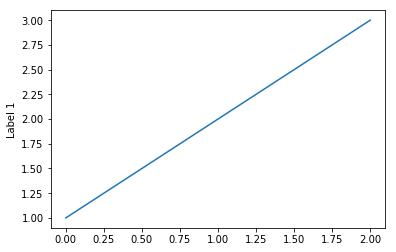

In [22]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt

plt.plot([1,2,3])
plt.ylabel('Label 1')
plt.show()